In [ ]:
How This Applies in WebPOSAI
Historical Data: Past products with category labels in your POS database.

Features: Price, weight, dimensions, brand encoding, etc.

Target: Product category.

✅ Outcome: When a store manager enters a new product with features only, the Naïve Bayes model instantly predicts its category for them to approve, saving operational time and improving inventory management accuracy.

Limitations in This Scenario
❌ Naïve Bayes assumes feature independence, which may not hold (e.g. price and brand often correlate).
❌ For continuous variables, it assumes normal distribution (Gaussian). If data is highly skewed, consider preprocessing or using another model.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Example: WebPOSAI product dataset
# X: features such as price, stock, weight, dimensions encoded as numerical values
# y: product category labels (e.g. Electronics=0, Groceries=1, Clothing=2)

# Simulating with iris dataset as placeholder for structure
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate Naïve Bayes classifier
model = GaussianNB()

# Train the model on historical product data
model.fit(X_train, y_train)

# Predict product categories for new incoming products
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [4]:
# Bayesian Programs Collection
# 1. Dice Probability Calculations
# 2. Shopper vs Window-Shopper Bayesian Update
# 3. Supermarket Naïve Bayes Classification Example

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Dice Probability Calculations

def dice_probabilities():
    # Define events
    outcomes = np.arange(1, 7)
    A = {1, 3, 5}        # odd
    B = {3, 6}           # multiples of 3

    p_A = len(A) / 6
    p_B = len(B) / 6
    p_A_and_B = len(A & B) / 6

    p_B_given_A = p_A_and_B / p_A
    p_A_given_B = p_A_and_B / p_B

    print("Event A (odd) probability:", p_A)
    print("Event B (multiple of 3) probability:", p_B)
    print("P(A ∩ B):", p_A_and_B)
    print("P(B | A):", p_B_given_A)
    print("P(A | B):", p_A_given_B)

# 2. Shopper vs Window-Shopper Bayesian Update

def shopper_bayes(prior_shopper=0.2, like_init_shopper=0.9, like_init_window=0.3):
    prior_window = 1 - prior_shopper
    # Joint probabilities
    joint_shopper = prior_shopper * like_init_shopper
    joint_window = prior_window * like_init_window
    evidence = joint_shopper + joint_window

    post_shopper = joint_shopper / evidence
    post_window = joint_window / evidence

    print(f"Posterior Shopper | Initiate: {post_shopper:.3f}")
    print(f"Posterior Window  | Initiate: {post_window:.3f}")

# 3. Supermarket Naïve Bayes Classification Example

def supermarket_naive_bayes():
    # Simulated feature data: [add_to_cart, time_gt_5min, coupon_scan]
    # Labels: 1=Buyer, 0=Browser
    X = np.array([
        [1,1,0], [1,1,1], [0,1,0], [0,0,0], [1,0,0],
        [0,1,1], [1,0,1], [0,0,1], [1,1,0], [0,1,0]
    ])
    y = np.array([1,1,0,0,1,0,1,0,1,0])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Train Gaussian Naïve Bayes
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print("Supermarket NB Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Main execution
if __name__ == "__main__":
    print("--- Dice Probabilities ---")
    dice_probabilities()
    print("\n--- Shopper Bayesian Update ---")
    shopper_bayes()
    print("\n--- Supermarket Naïve Bayes Example ---")
    supermarket_naive_bayes()


--- Dice Probabilities ---
Event A (odd) probability: 0.5
Event B (multiple of 3) probability: 0.3333333333333333
P(A ∩ B): 0.16666666666666666
P(B | A): 0.3333333333333333
P(A | B): 0.5

--- Shopper Bayesian Update ---
Posterior Shopper | Initiate: 0.429
Posterior Window  | Initiate: 0.571

--- Supermarket Naïve Bayes Example ---
Supermarket NB Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [5]:
import { PrismaClient } from '@prisma/client';
import KNN from 'ml-knn';

let knn: any;
export async function initModel() {
  const prisma = new PrismaClient();
  const products = await prisma.product.findMany();
  const features = products.map(p => [p.price, p.weight, p.salesAvg]);
  const labels   = products.map(p => p.category);
  knn = new KNN(features, labels, { k: 5 });
  await prisma.$disconnect();
}

export function classify(product: { price: number; weight: number; salesAvg: number }) {
  if (!knn) throw new Error('Model not initialized');
  const result = knn.predict([[product.price, product.weight, product.salesAvg]]);
  return result[0];
}

/* pages/api/predict.ts */
import type { NextApiRequest, NextApiResponse } from 'next';
import { initModel, classify } from '../../lib/knnModel';

// Initialize KNN on first request
let modelReady = false;
export default async function handler(req: NextApiRequest, res: NextApiResponse) {
  if (!modelReady) {
    await initModel();
    modelReady = true;
  }
  const { price, weight, salesAvg } = req.body;
  const category = classify({ price, weight, salesAvg });
  res.status(200).json({ category });
}

import { useState } from 'react';

export default function Home() {
  const [price, setPrice] = useState('');
  const [weight, setWeight] = useState('');
  const [salesAvg, setSalesAvg] = useState('');
  const [category, setCategory] = useState<string | null>(null);

  const handleSubmit = async (e) => {
    e.preventDefault();
    const resp = await fetch('/api/predict', {
      method: 'POST',
      headers: { 'Content-Type': 'application/json' },
      body: JSON.stringify({
        price: parseFloat(price),
        weight: parseFloat(weight),
        salesAvg: parseFloat(salesAvg)
      }),
    });
    const data = await resp.json();
    setCategory(data.category);
  };

  return (
    <div className="p-4 max-w-md mx-auto">
      <h1 className="text-xl font-bold mb-4">Product Category Predictor</h1>
      <form onSubmit={handleSubmit} className="space-y-4">
        <div>
          <label className="block">Price:</label>
          <input type="number" step="0.01" value={price}
            onChange={e => setPrice(e.target.value)} className="border p-1 w-full" />
        </div>
        <div>
          <label className="block">Weight:</label>
          <input type="number" step="0.01" value={weight}
            onChange={e => setWeight(e.target.value)} className="border p-1 w-full" />
        </div>
        <div>
          <label className="block">Avg Daily Sales:</label>
          <input type="number" value={salesAvg}
            onChange={e => setSalesAvg(e.target.value)} className="border p-1 w-full" />
        </div>
        <button type="submit" className="bg-blue-500 text-white px-4 py-2 rounded">Predict</button>
      </form>
      {category && <div className="mt-4">Predicted Category: <strong>{category}</strong></div>}
    </div>
  );
}


SyntaxError: invalid syntax (1887572757.py, line 1)

In [7]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data
X, y = load_iris(return_X_y=True)

# 2. Standardize features (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 4. Create and train KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Predict on test data
y_pred = knn.predict(X_test)

# 6. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Sample WebPOSAI product dataset
data = {
    'price': [9.99, 199.99, 49.99, 2.99, 299.99, 79.99, 5.99],
    'weight': [0.5, 1.2, 0.3, 0.2, 2.5, 0.8, 0.4],
    'salesAvg': [20, 5, 15, 30, 3, 10, 25],
    'category': ['Groceries', 'Electronics', 'Clothing', 'Groceries', 'Electronics', 'Clothing', 'Groceries']
}

df = pd.DataFrame(data)

# 2. Convert category labels to numeric
df['category_id'] = df['category'].astype('category').cat.codes

# 3. Features and labels
X = df[['price', 'weight', 'salesAvg']]
y = df['category_id']

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 6. Train SVM model (using RBF kernel)
model = svm.SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

# 8. Evaluation
print(classification_report(y_test, y_pred, target_names=df['category'].unique()))

# 9. Predicting a new product
new_product = pd.DataFrame({
    'price': [59.99],
    'weight': [0.7],
    'salesAvg': [12]
})

# Scale new product features
new_product_scaled = scaler.transform(new_product)

# Predict category
predicted_category_id = model.predict(new_product_scaled)[0]
predicted_category = df['category'].astype('category').cat.categories[predicted_category_id]

print(f"Predicted Category for new product: {predicted_category}")


              precision    recall  f1-score   support

   Groceries       0.00      0.00      0.00         1
 Electronics       1.00      1.00      1.00         1
    Clothing       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Predicted Category for new product: Groceries


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matplotlib is building the font cache; this may take a moment.


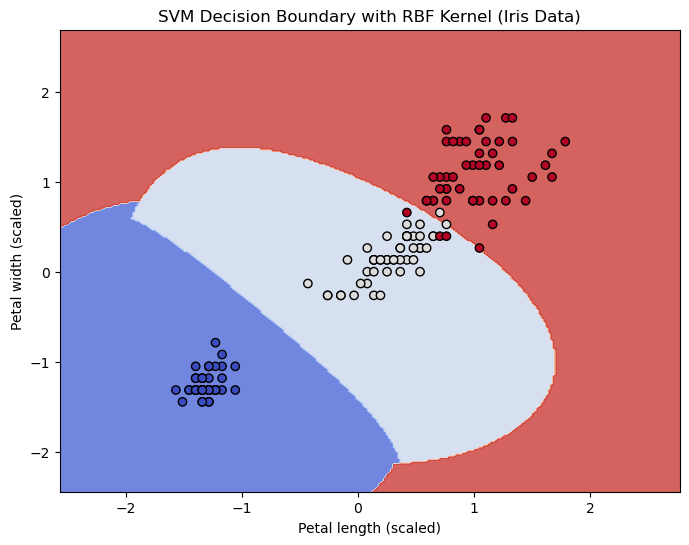

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Load dataset (using only petal length and width for 2D plot)
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # petal length and width
y = iris.target

# 2. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_scaled, y)

# 4. Plot decision boundaries
h = .02  # mesh step size
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal length (scaled)')
plt.ylabel('Petal width (scaled)')
plt.title('SVM Decision Boundary with RBF Kernel (Iris Data)')
plt.show()


In [12]:
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Sample WebPOSAI product dataset
data = {
    'price': [9.99, 199.99, 49.99, 2.99, 299.99, 79.99, 5.99],
    'weight': [0.5, 1.2, 0.3, 0.2, 2.5, 0.8, 0.4],
    'salesAvg': [20, 5, 15, 30, 3, 10, 25],
    'category': ['Groceries', 'Electronics', 'Clothing', 'Groceries', 'Electronics', 'Clothing', 'Groceries']
}
df = pd.DataFrame(data)

# 2. Convert category labels to numeric
df['category_id'] = df['category'].astype('category').cat.codes

# 3. Features and labels
X = df[['price', 'weight', 'salesAvg']]
y = df['category_id']

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 6. Train SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

# 8. Evaluation
print(classification_report(y_test, y_pred, target_names=df['category'].unique()))

# 9. Predict a new product category
new_product = pd.DataFrame({
    'price': [59.99],
    'weight': [0.7],
    'salesAvg': [12]
})

# Scale new product features
new_product_scaled = scaler.transform(new_product)

# Predict category
predicted_category_id = model.predict(new_product_scaled)[0]
predicted_category = df['category'].astype('category').cat.categories[predicted_category_id]

print(f"Predicted Category for new product: {predicted_category}")


              precision    recall  f1-score   support

   Groceries       0.00      0.00      0.00         1
 Electronics       1.00      1.00      1.00         1
    Clothing       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Predicted Category for new product: Groceries


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
